In [22]:
import pandas as pd

In [24]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 232 kB in 2s (117 kB/s)
Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3

In [25]:
url ='https://docs.google.com/spreadsheets/d/1iYHApNr4LjZWybk2O5tKI4NgxQX_0mG0j-KXId2r47A/export?format=csv&gid=0'
df = pd.read_csv(url)

In [5]:
df

,Name,Surname,Subjects (max 3 items),City,Country,Can help with (max 3 items)
0,Francesco,Turci,"disordered systems, soft matter, computational...",Bristol,UK,"editing, IT support, graphics"
1,Gianni,Petrella,"Mathematics, Physics, CS",Brussels,BE,"IT support and maintenance, AI, statistics"
2,Emanuele,Penocchio,"Physical Chemistry, Thermodynamics",Luxembourg,LU,"Festivaletteratura, organization, discussion o..."
3,Fulvio,Paleari,"Condensed matter, solid state, computational p...",Roma,IT,"editing, content discussion and production"
4,Riccardo,Impavido,"Physics, mathematics, philosophy",Padova,IT,"Writing, workshops"
5,Lavinia,Marziale,"mathematics, CS, linguistics",Montpellier,FR,"IT support, artistic experiments"
6,Maria Elena,Antinori,"biotechnology, microorganisms",Genova,IT,"workshops, interviews"
7,Elena Alma,Rastello,"book publishing, literature, linguistics",Torino,IT,"communication, discussion of contents"
8,Sara,Dal Cengio,"physics, chemistry",Barcelona,ES,"radio and podcasts, interviews"
9,Danilo,Forastiere,"Physical Chemistry, Thermodynamics",Luxembourg,LU,IT support and maintenance


In [6]:
subj = df['Subjects (max 3 items)']
all_subjs = [s.split(',') for s in subj]
all_subjs = [s.strip() for l in all_subjs for s in l]
all_subjs = " ".join([s.replace(' ', '_').lower() for s in all_subjs])

In [7]:
all_subjs

'disordered_systems soft_matter computational_physics mathematics physics cs physical_chemistry thermodynamics condensed_matter solid_state computational_physics physics mathematics philosophy mathematics cs linguistics biotechnology microorganisms book_publishing literature linguistics physics chemistry physical_chemistry thermodynamics scientific_communication literature linguistics mathematics philosophy graphics visual_arts thermodynamics disordered_systems'

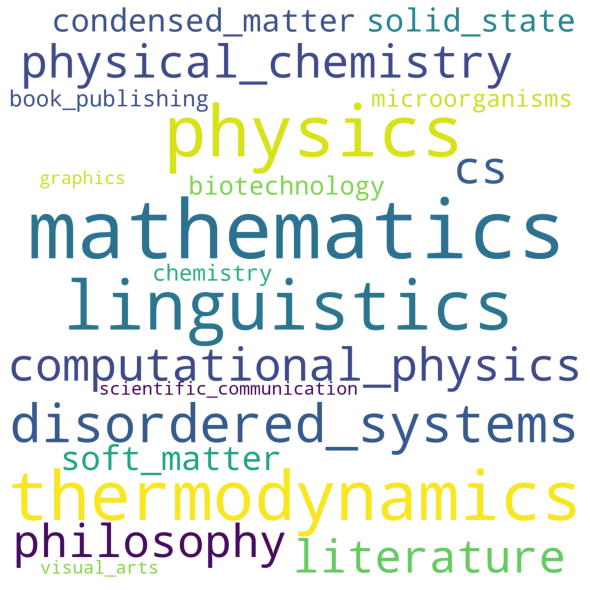

In [8]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_subjs) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [18]:
import os
import matplotlib.pyplot as plt
import numpy as np

from cartopy import config
import cartopy.crs as ccrs


ModuleNotFoundError: ignored